### Informe Coeficiente de Lyapunov

En este notebook se presentan el plot correspondiente al coeficiente de lyapunov.

El coeficiente se ha calculado usando el programa 'lyapunov.c'. Este programa no necesita ningún archivo, y suelta un fichero txt correspondiente a $\lambda$ respecto al tiempo. Este coeficiente $\lambda$ se calcula como la suma de los logaritmos de las diferencias de posición, y se renormaliza cada cierto número de pasos.


#### Programa 1: Ploteo del coeficiente de Lyapunov



##### Descripción del programa en C:

El programa lyapunov.c es similar al anterior péndulo doble. La primera diferencia es la existencia de 2 péndulos dobles. Se calculará la diferencia de las trayectorias entre ambos péndulos y se almacenará su logaritmo. Tras renormalización, se guarda en un archivo auxiliar. Se DEBE modificar la energía en el programa para obtener los resultados distintos y se debe cambiar manualmente el nombre del archivo para que satisfaga la configuración de python.


##### Descripción del programa en python:

Este programa lee los ficheros: "lya_{E}.txt" donde {E} es un real con precisión de 1 decimal. Se plotearán como curvas separadas representando al coeficiente de lyapunov para cada energía. Necesita de dichos archivos y suelta el ploteo.

Necesita:
- lya_{E}.txt

Suelta:
- curvas_lyapunov.png


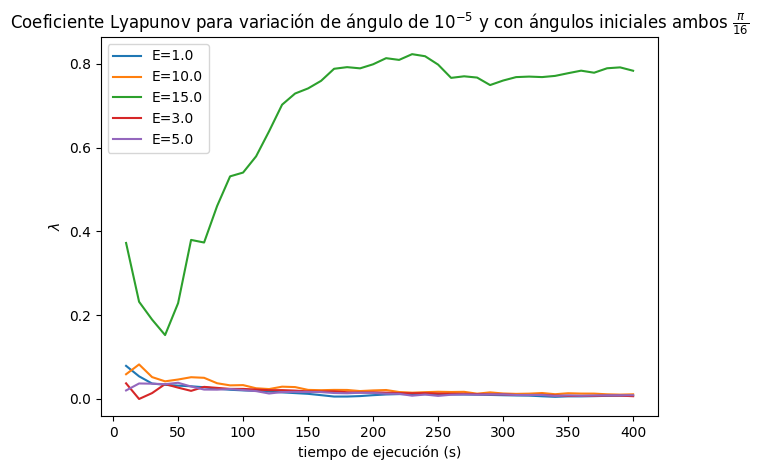

In [ ]:
import os
import re
import matplotlib.pyplot as plt

archivos = []
patron = re.compile(r"lya_([0-9]+\.[0-9])\.txt")  # Sin extensión

# Busca archivos que coincidan con el patrón
for nombre in os.listdir('.'):
    if patron.fullmatch(nombre):
        archivos.append(nombre)

archivos.sort()

for archivo in archivos:
    E = patron.match(archivo).group(1)
    x_vals = []
    y_vals = []
    try:
        with open(archivo, "r") as f:
            for linea in f:
                partes = linea.strip().split()
                if len(partes) >= 2:
                    try:
                        x = float(partes[0])
                        y = float(partes[1])
                        x_vals.append(x)
                        y_vals.append(y)
                    except ValueError:
                        print(f"Advertencia: línea no numérica en {archivo}: {linea.strip()}")
        if x_vals and y_vals:
            plt.plot(x_vals, y_vals, label=f"E={E}")
        else:
            print(f"Advertencia: {archivo} no contiene datos válidos.")
    except Exception as e:
        print(f"No se pudo abrir {archivo}: {e}")

plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel(r"$\lambda$")
plt.title(r"Coeficiente Lyapunov para variación de ángulo de $10^{-5}$ y con ángulos iniciales ambos $\frac{\pi}{16}$")
plt.legend()
plt.tight_layout()
plt.savefig("curvas_lyapunov.png")
plt.show()

Como podemos observar, este coeficiente se parece bastante al visto en el pdf del artículo: "A numerical analysis of chaos in the double pendulum" de Tomasz Stachowiak y Toshio Okada, que se encuentra el pdf en la misma carpeta que este notebook. En concreto miramos la figura de la última página.

¿Qué significa este plot? Pues que para energías bajas, el péndulo doble no exhibe comportamiento caótico. Sin embargo, para una energía grande, como por ejemplo E = 15, sí lo hace. Podemos ver esto ya que es la única curva que no decae la separación entre ambos pendulos, sino que aumenta hasta un comportamiento casi asintótico, ya que los péndulos no pueden separarse más.